<a href="https://colab.research.google.com/github/jcdevaney/data71200su24/blob/main/class6/data71200class6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 2.9 MB/s eta 0:00:00


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_iris

# load Iris dataset
iris = load_iris()



split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris.data, iris.target):
    X_train = iris.data[train_index]
    X_test = iris.data[test_index]
    y_train = iris.target[train_index]
    y_test = iris.target[test_index]

In [ ]:
# polynomial kernel
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 1.00


In [ ]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 1.00


## Parameter Tuning  

In [ ]:
# constrained model (low C and low gamma)
svmRBF2 = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF2.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.90


In [ ]:
# constrained model (low C and low gamma)
svmRBF3 = SVC(kernel='rbf', C=1000, gamma=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF3.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.90


## Balanced Cross-Validation Split and Grid Search

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [ ]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))


The best parameters are {'C': 0.1, 'gamma': 0.1} with a score of 0.97


In [ ]:
# polynomial kernel
svmPolyGrid = SVC(kernel='poly', C=0.1, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPolyGrid.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPolyGrid.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.97


In [ ]:
#rbf kernel
gridRBF = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridRBF.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridRBF.best_params_, gridRBF.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


In [ ]:
svmRBFgrid = SVC(kernel='rbf', C=1, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBFgrid.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBFgrid.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.93


## Feature Scaling

Text(0, 0.5, 'Feature magnitude')

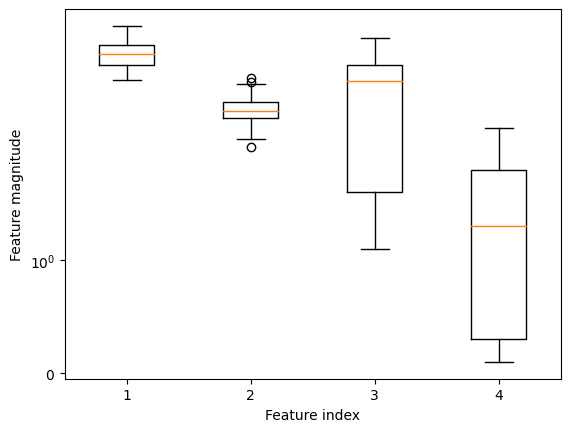

In [ ]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1.]


In [ ]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

### Default Parameters

In [ ]:
# Polynomial Kernel

print('Original Features')
print("Accuracy on training set: {:.3f}".format(
        svmPolyGrid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svmPolyGrid.score(X_test, y_test)))

svmPolyScaled = SVC(kernel='poly', C=0.1, gamma=0.1).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmPolyScaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmPolyScaled.score(X_test_scaled, y_test)))

Original Features
Accuracy on training set: 0.975
Accuracy on test set: 0.967

Scaled Features
Accuracy on training set: 0.633
Accuracy on test set: 0.700


In [ ]:
# Radial Basis Function Kernel

print('Original Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFgrid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svmRBFgrid.score(X_test, y_test)))

svmRBFscaled = SVC(kernel='rbf', C=1, gamma=0.1).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFscaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmRBFscaled.score(X_test_scaled, y_test)))

Original Features
Accuracy on training set: 0.983
Accuracy on test set: 0.933

Scaled Features
Accuracy on training set: 0.958
Accuracy on test set: 0.900


### Optimal Parameters

In [ ]:
# redo grid search on scaled features

# polynomial kernel
gridPoly2 = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly2.fit(X_train_scaled, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly2.best_params_, gridPoly2.best_score_))

The best parameters are {'C': 0.1, 'gamma': 10.0} with a score of 0.97


In [ ]:
print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmPolyScaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svmPolyScaled.score(X_test_scaled, y_test)))

svmPolyScaled2 = SVC(kernel='poly', C=0.1, gamma=10).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmPolyScaled2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmPolyScaled2.score(X_test_scaled, y_test)))

Scaled Features
Accuracy on training set: 0.633
Accuracy on test set: 0.700

Scaled Features
Accuracy on training set: 0.983
Accuracy on test set: 1.000


In [ ]:
#rbf kernel
gridRBF2 = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridRBF2.fit(X_train_scaled, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridRBF2.best_params_, gridRBF2.best_score_))

The best parameters are {'C': 10000000.0, 'gamma': 1e-06} with a score of 0.98


In [ ]:
print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFscaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svmRBFscaled.score(X_test_scaled, y_test)))

svmRBFscaled2 = SVC(kernel='rbf', C=10000000.0, gamma=1e-06, probability=True).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFscaled2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmRBFscaled2.score(X_test_scaled, y_test)))

Scaled Features
Accuracy on training set: 0.958
Accuracy on test set: 0.900

Scaled Features
Accuracy on training set: 0.967
Accuracy on test set: 1.000


# Uncertainty estimates from classifiers

In [ ]:
print("Thresholded decision function:\n",
      svmRBFscaled2.decision_function(X_test_scaled) > 1.5)
print("Predictions:\n", svmRBFscaled2.predict(X_test_scaled))

Thresholded decision function:
 [[ True False False]
 [False False  True]
 [False  True False]
 [False  True False]
 [ True False False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False  True False]
 [ True False False]
 [False False  True]
 [ True False False]]
Predictions:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [ ]:
decision_function = svmRBFscaled2.decision_function(X_test_scaled)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -0.31 maximum: 2.28


In [ ]:
print("Decision function shape:", svmRBFscaled2.decision_function(X_test_scaled).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(svmRBFscaled2.decision_function(X_test_scaled)[:6, :])

Decision function shape: (30, 3)
Decision function:
[[ 2.24845914  1.29714452 -0.30587212]
 [-0.26570613  1.24038237  2.19105727]
 [-0.17271757  2.2752294   0.7381744 ]
 [-0.18126427  2.27605552  0.7386982 ]
 [ 2.2520304   1.2972791  -0.30633234]
 [-0.25287042  2.25912813  0.91369871]]


In [ ]:
print("Argmax of decision function:")
print(np.argmax(svmRBFscaled2.decision_function(X_test_scaled), axis=1))
print("Predictions:")
print(svmRBFscaled2.predict(X_test_scaled))

Argmax of decision function:
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Predictions:
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [ ]:
# Predicting Probabilities
print("Shape of probabilities:", svmRBFscaled2.predict_proba(X_test_scaled).shape)
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(svmRBFscaled2.predict_proba(X_test_scaled)[:6])
# show that sums across rows are one
print("Sums:", svmRBFscaled2.predict_proba(X_test_scaled)[:6].sum(axis=1))

Shape of probabilities: (30, 3)
Predicted probabilities:
[[0.97113572 0.01747962 0.01138466]
 [0.01829395 0.31454475 0.6671613 ]
 [0.09105923 0.8852293  0.02371147]
 [0.07492981 0.90489778 0.02017241]
 [0.97688539 0.01326638 0.00984823]
 [0.01273406 0.79906333 0.1882026 ]]
Sums: [1. 1. 1. 1. 1. 1.]


In [ ]:
print("Argmax of predicted probabilities:")
print(np.argmax(svmRBFscaled2.predict_proba(X_test_scaled), axis=1))
print("Predictions:")
print(svmRBFscaled2.predict(X_test_scaled))

Argmax of predicted probabilities:
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Predictions:
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
